Exploración de los Datos

In [ ]:
#Se importa la librería de pandas para leer el archivo
import pandas as pd
#Se lee la base de datos
df = pd.read_csv('datos_viva.csv')
#Imprimir las primeras filas de la base de datos.
df.head()

,Date,nps,text,Unnamed: 3
0,12/01/23 14:39,5,didnt accept my bank card,NaN
1,12/01/23 14:40,10,Por que los vuelos están económicos.,NaN
2,12/01/23 14:40,10,Facil y segura de manejar,NaN
3,12/01/23 14:42,5,No recomiendo nada a nadie,NaN
4,12/01/23 14:42,10,POR SU SERVICIO Y LO FACIL DE PODER COMPRAR PO...,NaN


Data Cleaning

In [ ]:
#Se imprtan las librerías necesarias.
from unicodedata import normalize
import pandas as pd
import re

#Se eliminan puntos, comas, signos de exclamación y signos de interrogación
def eliminar_puntuacion(text):
    text = re.sub(r'[.,!?]', '', text)
    return text

#Se eliminan los valores nulos.
def eliminar_nan(text):
    if pd.notnull(text):
        return text
    else:
        return ''

#Se eliminan emoticones, simbolos y banderas.
def eliminar_simbolos(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"  # miscellaneous symbols
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

#Se eliminan palabras de menos de 1 caracter de longitud.
def eliminar_palabras_cortas(text):
    words = text.split()
    filtered_words = [word for word in words if len(word) > 1]
    text = ' '.join(filtered_words)
    return text

#Se convierte la columna a string.

column_name = 'text'
for i, value in df[column_name].items():
    if pd.notnull(value):
        if isinstance(value, float):
            value = str(value)

        # Se eliminan acentos
        s = str(value)
        trans_tab = dict.fromkeys(map(ord, u'\u0301\u0308'), None)
        s = normalize('NFKC', normalize('NFKD', s.lower()).translate(trans_tab))

        # Se aplican las funciones previamente definidas.
        s = eliminar_puntuacion(s)
        s = eliminar_nan(s)
        s = eliminar_simbolos(s)
        s = eliminar_palabras_cortas(s)

        # Se modifica el texto directamente en la base de datos.
        df.loc[i, column_name] = s

#Se elimina la columna de fecha
df = df.drop('Date', axis=1)

#Se elimina la columna de NANs extra
df = df.drop('Unnamed: 3', axis=1)

df.head()


,nps,text
0,5,didnt accept my bank card
1,10,por que los vuelos estan economicos
2,10,facil segura de manejar
3,5,no recomiendo nada nadie
4,10,por su servicio lo facil de poder comprar por ...


Feature Engineering

In [ ]:
#Se importan las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline

#Se elige el color de la gráfica
color = sns.color_palette()

#Se grafica el valor de NPS dependiendo de las repeticiones.
fig = px.histogram(df, x = "nps")
fig.update_layout(title_text = "NPS - Booking Flow")
fig.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


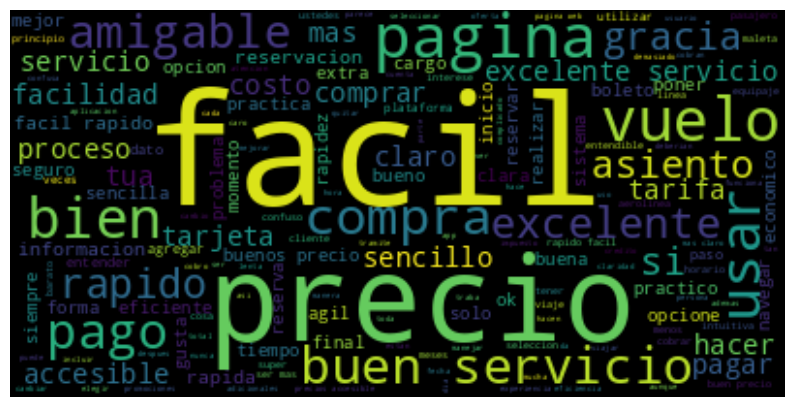

In [ ]:
#Se importan las librerías necesarias
from unicodedata import normalize
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

#Se descargan las stopwords de la librería.
nltk.download('stopwords')

# Se crea la lista de stopwords, tomando en cuenta inglés y español.
stopwords = set(stopwords.words('english') + stopwords.words('spanish'))
stopwords.update(["br", "href"])

# Se convierten los valores a string en la columna de text.
text = " ".join(str(review) for review in df.text)

# Se genera la wordCloud.
wordcloud = WordCloud(stopwords=stopwords)

# Se modifica el tamaño de la gráfica.
plt.figure(figsize=(10, 6))

# Se imprime la gráfica.
plt.imshow(wordcloud.generate(text), interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Se evalua si el sentimiento es 1 (positivo) o -1 (negativo) dependiendo de su nps
#NPS de 0-7 será -1, 8-10 será 1.
df['sentimiento'] = df['nps'].apply(lambda rating: +1 if rating > 8 else -1)
df

,nps,text,sentimiento
0,5,didnt accept my bank card,-1
1,10,por que los vuelos estan economicos,1
2,10,facil segura de manejar,1
3,5,no recomiendo nada nadie,-1
4,10,por su servicio lo facil de poder comprar por ...,1
...,...,...,...
48772,10,facil de entender con filtros detalle,1
48773,10,,1
48774,2,dicen un precio salen con otro los taxes deben...,-1
48775,8,todo ok,-1


In [ ]:
# Partimos el df en positivo y negativo
positive = df[df['sentimiento'] == 1]
negative = df[df['sentimiento'] == -1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


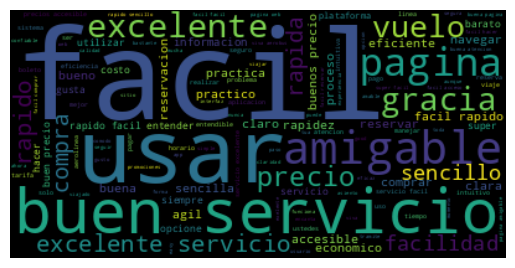

In [ ]:
#Se importan las librerías necesarias
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

# Se crea la lista de stopwords, tomando en cuenta ciertas palabras como si, no, ok.
stopwords = set(stopwords.words('english') + stopwords.words('spanish'))
stopwords.update(["br", "href", "bien", "mas", "si", "no", "ok"])

#Se convierte la columna a strings en 'positive.text'
pos = " ".join(str(review) for review in positive.text)

# Se genera la word cloud.
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)

# Se imprime usando la gráfica.
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()


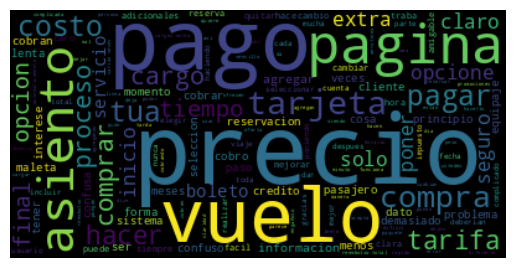

In [ ]:
#Se realiza el mismo proceso para las variables negativas.
neg = " ".join(str(review) for review in negative.text)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [ ]:
import plotly.express as px

#Se calculan las 15 palabras más frecuentes dentro de la categoría de positivo.
words = positive.text.str.split(expand=True).stack().tolist()
words = [word.lower() for word in words if word.lower() not in stopwords]
word_counts = pd.Series(words).value_counts().sort_values(ascending=False)
top_words_df = pd.DataFrame({'Palabra': word_counts[:15].index, 'Frecuencia': word_counts[:15].values})

# Graficar el histograma
fig = px.bar(top_words_df, x='Palabra', y='Frecuencia', title='Frecuencia de las 15 palabras positivas más comunes',
             color_discrete_sequence=['#1f77b4'])
fig.update_xaxes(tickangle=45, tickfont=dict(size=8))
fig.show()

In [ ]:
#Mismo proceso para las variables negativas
words = negative.text.str.split(expand=True).stack().tolist()
words = [word.lower() for word in words if word.lower() not in stopwords]
word_counts = pd.Series(words).value_counts().sort_values(ascending=False)

top_words_df = pd.DataFrame({'Palabra': word_counts[:15].index, 'Frecuencia': word_counts[:15].values})
fig = px.bar(top_words_df, x='Palabra', y='Frecuencia', title='Frecuencia de las 15 palabras negativas más comunes',
             color_discrete_sequence=['#1f77b4'])
fig.update_xaxes(tickangle=45, tickfont=dict(size=8))
fig.show()

In [ ]:
#Se imprime una gráfica que muestra el ratio de reseñas positivas y negativas
df['sentimiento'] = df['sentimiento'].replace({-1 : 'Negativo'})
df['sentimiento'] = df['sentimiento'].replace({1 : 'Positivo'})

fig = px.histogram(df, x="sentimiento", nbins=2,
                   labels={'sentimiento': 'Sentimiento', 'count': 'Cantidad'})

fig.update_traces(marker_color="#1f77b4", marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)

fig.update_layout(title_text='Sentimientos del Booking Flow',
                  xaxis_title_text='Sentimiento',
                  yaxis_title_text='Cantidad')

fig.show()


In [ ]:
#Se crea un nuevo df con las columnas de text y sentimiento.
dfNew = df[['text','sentimiento']]
dfNew.head(15)

,text,sentimiento
0,didnt accept my bank card,Negativo
1,por que los vuelos estan economicos,Positivo
2,facil segura de manejar,Positivo
3,no recomiendo nada nadie,Negativo
4,por su servicio lo facil de poder comprar por ...,Positivo
5,poner desde el inicio que ademas del tua se ag...,Negativo
6,el sistema no estuvo funcionando por un dia en...,Negativo
7,buen servicio,Positivo
8,todo ok,Positivo
9,exelente experiencia precios muy convenientes,Positivo


Desarrollo del Modelo

In [ ]:
# random split train y test data
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [ ]:
# count vectorizer para que el modelo pueda leer numeros
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train = train.dropna(subset=['text'])
train_matrix = vectorizer.fit_transform(train['text'])
test = test.dropna(subset=['text'])
test_matrix = vectorizer.transform(test['text'])

In [ ]:
# regresión logística
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# Se nombran las variables
X_train = train_matrix
X_test = test_matrix
y_train = train['sentimiento']
y_test = test['sentimiento']

In [ ]:
#Se utiliza el modelo
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
#Se crean las predicciones
predictions = lr.predict(X_test)

Criterio de Evaluación

In [ ]:
# Se hace la matriz de confusión
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[2755,  290],
       [ 535, 6737]])

In [ ]:
#Se imprime el accuracy de 92%
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

    Negativo       0.84      0.90      0.87      3045
    Positivo       0.96      0.93      0.94      7272

    accuracy                           0.92     10317
   macro avg       0.90      0.92      0.91     10317
weighted avg       0.92      0.92      0.92     10317

